In [1]:
%matplotlib inline
# %matplotlib notebook
%load_ext autoreload
%autoreload 2


import os,sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import helper
import simulation

# print(sys.version_info)

# # Generate some random images
# input_images, target_masks = simulation.generate_random_data(192, 192, count=3)

# # for x in [input_images, target_masks]:
# #     print(x.shape)
# #     print(x.min(), x.max())
# # print(len(input_images))
# # print(input_images[0].shape)
# # print(target_masks[0].shape)


# # Change channel-order and make 3 channels for matplot
# input_images_rgb = [x.astype(np.uint8) for x in input_images]

# # Map each channel (i.e. class) to each color
# target_masks_rgb = [helper.masks_to_colorimg(x) for x in target_masks]
# # print(target_masks[0][0])
# # print(target_masks_rgb[0][0][0])
# # Left: Input image, Right: Target mask (Ground-truth)
# # print(input_images_rgb[0].shape)
# # print(target_masks_rgb[0].shape)
# helper.plot_side_by_side([input_images_rgb, target_masks_rgb])
# # helper.plot_side_by_side([input_images, target_masks])


In [2]:
# the first working version which one slice was copied in 3 channels 3 times and was working without bug

# from torch.utils.data import Dataset, DataLoader
# import torch
# print(torch.cuda.is_available())

# from torchvision import transforms
# from torchvision import datasets
# import natsort
# from PIL import *
# import albumentations as A
# # cwd = os.getcwd()
# # print(cwd)

# def showIm(img) -> None:
#     """
#     View multiple images stored in files, stacking vertically

#     Arguments:
#         filename: str - path to filename containing image
#     """
 
#     # <something gets done here>
#     plt.figure()
#     plt.imshow(img)

# def showAll(picList):
#     for im in picList:
#         plt.figure()
#         plt.imshow(im)
    
# imgList = []

# class SimDataset(Dataset):
#     def __init__(self, main_dir, transform=None):
# #         self.input_images, self.target_masks = simulation.generate_random_data(192, 192, count=count)        
#         self.main_dir = main_dir
#         self.transform = transform
#         self.input_images = os.listdir(main_dir + '/image/')
#         self.target_masks = os.listdir(main_dir + '/mask')
#         self.input_images = natsort.natsorted(self.input_images)
#         self.target_masks = natsort.natsorted(self.target_masks)

#     def __len__(self):
#         return len(self.input_images)
    

#     def __getitem__(self, idx):        
#         image = self.input_images[idx]
#         mask = self.target_masks[idx]
        
#         img_loc = os.path.join(self.main_dir, 'image', image)
#         mask_loc = os.path.join(self.main_dir, 'mask', mask)

# #         image = np.load(img_loc).type(torch.FloatTensor)
# #         mask = np.load(mask_loc).type(torch.FloatTensor)
#         image = torch.from_numpy(np.load(img_loc)).type(torch.FloatTensor)
#         mask = torch.from_numpy(np.load(mask_loc)).type(torch.FloatTensor)
        
#         #         mask = 1 - mask
#         imgList.append(image)
#         imgList.append(mask)
        
#         image = np.repeat(image[np.newaxis, :,:], 3, axis=0)
#         mask = np.repeat(mask[np.newaxis, :, :], 1, axis=0)
# #         image = np.transpose(image, (1, 2, 0))
# #         mask = np.transpose(mask, (1, 2, 0))
        
   
#         if self.transform:
#             transformed = self.transform(image=image, mask=mask)
        
#         return [image, mask]

# # n = 1
# # train_dataset_path = './data/train1'
# # val_dataset_path = './data/val1'
# # n = 32
# train_dataset_path = './data/train'
# val_dataset_path = './data/val'
# # n = all
# # train_dataset_path = './data/trainold'
# # val_dataset_path = './data/valold'


# train_set = SimDataset(
#     main_dir=train_dataset_path, 
#     transform=None
# )
# val_set = SimDataset(
#     main_dir=val_dataset_path, 
#     transform=None
# )

# image_datasets = {
#     'train': train_set, 'val': val_set
# }

# batch_size = 4
# num_workers = 25

# dataloaders = {
#     'train': DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=num_workers),
#     'val': DataLoader(val_set, batch_size=batch_size, shuffle=True, num_workers=num_workers)
# }

# dataset_sizes = {
#     x: len(image_datasets[x]) for x in image_datasets.keys()
# }

# inputs, masks = next(iter(dataloaders['train']))
# num = 0
# print(inputs.shape)
# print(masks.shape)
# img = inputs[0][0]
# mask = masks[0][0]
# img = inputs[num][0]

# imgList.append(img)
# imgList.append(mask)

# print(img.shape)
# showAll(imgList)

True
torch.Size([8, 3, 512, 512])
torch.Size([8, 1, 512, 512])
torch.Size([512, 512])


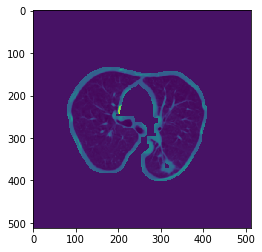

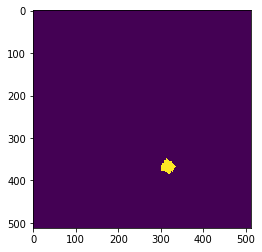

In [3]:
# 3 different slices in each channel

from torch.utils.data import Dataset, DataLoader
import torch
print(torch.cuda.is_available())

from torchvision import transforms
from torchvision import datasets
import natsort
from PIL import *
import albumentations as A
# cwd = os.getcwd()
# print(cwd)

def showIm(img) -> None:
    """
    View multiple images stored in files, stacking vertically

    Arguments:
        filename: str - path to filename containing image
    """
 
    # <something gets done here>
    plt.figure()
    plt.imshow(img)

def showAll(picList):
    for im in picList:
        plt.figure()
        plt.imshow(im)
    
imgList = []

class SimDataset(Dataset):
    def __init__(self, main_dir, transform=None):
#         self.input_images, self.target_masks = simulation.generate_random_data(192, 192, count=count)        
        self.main_dir = main_dir
        self.transform = transform
        self.input_images = os.listdir(main_dir + '/image/')
        self.target_masks = os.listdir(main_dir + '/mask')
        self.input_images = natsort.natsorted(self.input_images)
        self.target_masks = natsort.natsorted(self.target_masks)

    def __len__(self):
        return len(self.input_images)
    
    def _get_prev_next(self, idx, image_list_set, mask_list_set):
        main_slice = self.input_images[idx]
        
        slice_num = int(main_slice[16:19])
        prev_num = slice_num - 1
        next_num = slice_num + 1
        
        prev_num = "%03d" % prev_num
        next_num = "%03d" % next_num
    
        
        prev_slice = prev_num.join([main_slice[0:15], main_slice[19:]])
        next_slice = next_num.join([main_slice[0:15], main_slice[19:]])
        
        if not (prev_slice in image_list_set):
            prev_slice = main_slice
        if not (next_slice in image_list_set):
            next_slice = main_slice
            
#         print(type(self.input_images))
#         print(str(type(main_slice)) + ' ' + main_slice + ' ' + str(slice_num) + ' ' + str(prev_num) + ' ' + str(next_num) + ' ' + prev_slice + ' ' + next_slice)
#         print(main_slice)
#         print()
        return prev_slice, next_slice
    
    def __getitem__(self, idx):        
        image = self.input_images[idx]
        mask = self.target_masks[idx]
        
        
        image_list_set = set(self.input_images)
        mask_list_set = set(self.target_masks)
        
        prev_slice, next_slice = self._get_prev_next(idx, image_list_set, mask_list_set)
        
        prev_loc = os.path.join(self.main_dir, 'image', prev_slice)
        next_loc = os.path.join(self.main_dir, 'image', next_slice)
        img_loc = os.path.join(self.main_dir, 'image', image)
        mask_loc = os.path.join(self.main_dir, 'mask', mask)

#         image = np.load(img_loc).type(torch.FloatTensor)
#         mask = np.load(mask_loc).type(torch.FloatTensor)
        mid_slice = torch.from_numpy(np.load(img_loc)).type(torch.FloatTensor)
        prev_slice = torch.from_numpy(np.load(prev_loc)).type(torch.FloatTensor)
        next_slice = torch.from_numpy(np.load(next_loc)).type(torch.FloatTensor)
        mask = torch.from_numpy(np.load(mask_loc)).type(torch.FloatTensor)
        
        image_3d = torch.stack([prev_slice, mid_slice, next_slice], dim=0)
        
        #         mask = 1 - mask
        
#         print(image_3d.shape)
#         self._get_prev_next(idx, image_list_set, mask_list_set)
        
        image = np.repeat(image_3d[np.newaxis, :,:], 1, axis=0)
        mask = np.repeat(mask[np.newaxis, :, :], 1, axis=0)
#         image = np.transpose(image, (1, 2, 0))
#         mask = np.transpose(mask, (1, 2, 0))
        
   
        if self.transform:
            transformed = self.transform(image=image, mask=mask)
        
        return [image_3d, mask]

# n = 1
# train_dataset_path = './data/train1'
# val_dataset_path = './data/val1'
# n = 32
train_dataset_path = './data/train'
val_dataset_path = './data/val'
# n = all
# train_dataset_path = './data/trainold'
# val_dataset_path = './data/valold'


train_set = SimDataset(
    main_dir=train_dataset_path, 
    transform=None
)
val_set = SimDataset(
    main_dir=val_dataset_path, 
    transform=None
)

image_datasets = {
    'train': train_set, 'val': val_set
}

batch_size = 8
num_workers = 25

dataloaders = {
    'train': DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=num_workers),
    'val': DataLoader(val_set, batch_size=batch_size, shuffle=True, num_workers=num_workers)
}

dataset_sizes = {
    x: len(image_datasets[x]) for x in image_datasets.keys()
}

inputs, masks = next(iter(dataloaders['train']))
num = 0
print(inputs.shape)
print(masks.shape)
img = inputs[0][0]
mask = masks[0][0]
img = inputs[num][0]

imgList.append(img)
imgList.append(mask)

print(img.shape)
showAll(imgList)

In [4]:
# import torchvision.utils

# def reverse_transform(inp):
#     inp = inp.numpy().transpose((1, 2, 0))
#     inp = np.clip(inp, 0, 1)
#     inp = (inp * 255).astype(np.uint8)
    
#     return inp

# print(target_masks_rgb[0].shape)
# print(reverse_transform(target_masks_rgb[0]).shape)


In [5]:
# inputs, masks = next(iter(dataloaders['train']))

# print(inputs.shape, masks.shape)
# for x in [inputs.numpy(), masks.numpy()]:
#     print(x.min(), x.max(), x.mean(), x.std())

# plt.imshow(reverse_transform(inputs[3]))

##### import torchvision.utils

def reverse_transform(inp):
    inp = inp.numpy().transpose((1, 2, 0))
    inp = np.clip(inp, 0, 1)
    inp = (inp * 255).astype(np.uint8)
    
    return inp

# Get a batch of training data
inputs, masks = next(iter(dataloaders['train']))

print(inputs.shape, masks.shape)
for x in [inputs.numpy(), masks.numpy()]:
    print(x.min(), x.max(), x.mean(), x.std())

plt.imshow(reverse_transform(inputs[3]))

In [6]:
from torchsummary import summary
import torch
import torch.nn as nn
import pytorch_unet

# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

n_out_class = 1

# model = pytorch_unet.UNet(n_out_class)
# model = torch.hub.load('mateuszbuda/brain-segmentation-pytorch', 'unet',
#     in_channels=1, out_channels=1, init_features=32, pretrained=False)

# model = model.to(device)

# print(next(model.parameters()).is_cuda)

# summary(model, input_size=(1, 512, 512))

In [7]:

# import torch
# import torch.nn as nn
# import torch.nn.functional as F
# import torchvision

# class DoubleConv(nn.Module):
#     """(convolution => [BN] => ReLU) * 2"""

#     def __init__(self, in_channels, out_channels, mid_channels=None):
#         super().__init__()
#         if not mid_channels:
#             mid_channels = out_channels
#         self.double_conv = nn.Sequential(
#             nn.Conv2d(in_channels, mid_channels, kernel_size=3, padding=1),
#             nn.BatchNorm2d(mid_channels),
#             nn.ReLU(inplace=True),
#             nn.Conv2d(mid_channels, out_channels, kernel_size=3, padding=1),
#             nn.BatchNorm2d(out_channels),
#             nn.ReLU(inplace=True)
#         )

#     def forward(self, x):
#         return self.double_conv(x)


# class Down(nn.Module):
#     """Downscaling with maxpool then double conv"""

#     def __init__(self, in_channels, out_channels):
#         super().__init__()
#         self.maxpool_conv = nn.Sequential(
#             nn.MaxPool2d(2),
#             DoubleConv(in_channels, out_channels)
#         )

#     def forward(self, x):
#         return self.maxpool_conv(x)


# class Up(nn.Module):
#     """Upscaling then double conv"""

#     def __init__(self, in_channels, out_channels, bilinear=True):
#         super().__init__()

#         # if bilinear, use the normal convolutions to reduce the number of channels
#         if bilinear:
#             self.up = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)
#             self.conv = DoubleConv(in_channels, out_channels, in_channels // 2)
#         else:
#             self.up = nn.ConvTranspose2d(in_channels , in_channels // 2, kernel_size=2, stride=2)
#             self.conv = DoubleConv(in_channels, out_channels)


#     def forward(self, x1, x2):
#         x1 = self.up(x1)
#         # input is CHW
#         diffY = x2.size()[2] - x1.size()[2]
#         diffX = x2.size()[3] - x1.size()[3]

#         x1 = F.pad(x1, [diffX // 2, diffX - diffX // 2,
#                         diffY // 2, diffY - diffY // 2])
#         # if you have padding issues, see
#         # https://github.com/HaiyongJiang/U-Net-Pytorch-Unstructured-Buggy/commit/0e854509c2cea854e247a9c615f175f76fbb2e3a
#         # https://github.com/xiaopeng-liao/Pytorch-UNet/commit/8ebac70e633bac59fc22bb5195e513d5832fb3bd
#         x = torch.cat([x2, x1], dim=1)
#         return self.conv(x)

# class OutConv(nn.Module):
#     def __init__(self, in_channels, out_channels):
#         super(OutConv, self).__init__()
#         self.conv = nn.Conv2d(in_channels, out_channels, kernel_size=1)

#     def forward(self, x):
#         return self.conv(x)


In [8]:
# """ Full assembly of the parts to form the complete network """

# import torch.nn.functional as F

# # from .unet_parts import *


# class NewUnet(nn.Module):
#     def __init__(self, n_channels, n_classes, bilinear=True):
#         super(NewUnet, self).__init__()
#         self.n_channels = n_channels
#         self.n_classes = n_classes
#         self.bilinear = bilinear

#         self.inc = DoubleConv(n_channels, 64)
#         self.down1 = Down(64, 128)
#         self.down2 = Down(128, 256)
#         self.down3 = Down(256, 512)
#         factor = 2 if bilinear else 1
#         self.down4 = Down(512, 1024 // factor)
#         self.up1 = Up(1024, 512 // factor, bilinear)
#         self.up2 = Up(512, 256 // factor, bilinear)
#         self.up3 = Up(256, 128 // factor, bilinear)
#         self.up4 = Up(128, 64, bilinear)
#         self.outc = OutConv(64, n_classes)

#     def forward(self, x):
#         x1 = self.inc(x)
#         x2 = self.down1(x1)
#         x3 = self.down2(x2)
#         x4 = self.down3(x3)
#         x5 = self.down4(x4)
#         x = self.up1(x5, x4)
#         x = self.up2(x, x3)
#         x = self.up3(x, x2)
#         x = self.up4(x, x1)
#         logits = self.outc(x)
#         return logits

In [9]:
import torch
from torch import nn
import torch.nn.functional as F

class double_conv(nn.Module):
    def __init__(self, in_ch, out_ch):
        super(double_conv, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(in_ch, out_ch, 3, padding=1),
            nn.BatchNorm2d(out_ch),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_ch, out_ch, 3, padding=1),
            nn.BatchNorm2d(out_ch),
            nn.ReLU(inplace=True)
        )

    def forward(self, x):
        x = self.conv(x)
        return x


class up(nn.Module):
    def __init__(self, in_ch, out_ch):
        super(up, self).__init__()
        self.up_scale = nn.ConvTranspose2d(in_ch, out_ch, 2, stride=2)

    def forward(self, x1, x2):
        x2 = self.up_scale(x2)

        diffY = x1.size()[2] - x2.size()[2]
        diffX = x1.size()[3] - x2.size()[3]

        x2 = F.pad(x2, [diffX // 2, diffX - diffX // 2,
                        diffY // 2, diffY - diffY // 2])
        x = torch.cat([x2, x1], dim=1)
        return x


class down_layer(nn.Module):
    def __init__(self, in_ch, out_ch):
        super(down_layer, self).__init__()
        self.pool = nn.MaxPool2d(2, stride=2, padding=0)
        self.conv = double_conv(in_ch, out_ch)

    def forward(self, x):
        x = self.conv(self.pool(x))
        return x


class up_layer(nn.Module):
    def __init__(self, in_ch, out_ch):
        super(up_layer, self).__init__()
        self.up = up(in_ch, out_ch)
        self.conv = double_conv(in_ch, out_ch)

    def forward(self, x1, x2):
        a = self.up(x1, x2)
        x = self.conv(a)
        return x


class NewUnet(nn.Module):
    def __init__(self, dimensions=2):
        super(NewUnet, self).__init__()
        self.conv1 = double_conv(1, 64)
        self.down1 = down_layer(64, 128)
        self.down2 = down_layer(128, 256)
        self.down3 = down_layer(256, 512)
        self.down4 = down_layer(512, 1024)
        self.up1 = up_layer(1024, 512)
        self.up2 = up_layer(512, 256)
        self.up3 = up_layer(256, 128)
        self.up4 = up_layer(128, 64)
        self.last_conv = nn.Conv2d(64, dimensions, 1)

    def forward(self, x):
        x1 = self.conv1(x)
        x2 = self.down1(x1)
        x3 = self.down2(x2)
        x4 = self.down3(x3)
        x5 = self.down4(x4)
        x1_up = self.up1(x4, x5)
        x2_up = self.up2(x3, x1_up)
        x3_up = self.up3(x2, x2_up)
        x4_up = self.up4(x1, x3_up)
        output = self.last_conv(x4_up)
        return output

In [10]:
from torch.utils.tensorboard import SummaryWriter
import shutil

shutil.rmtree('./runs/train')
shutil.rmtree('./runs/val')

os.mkdir('./runs/train')
os.mkdir('./runs/val')

trainWriter = SummaryWriter('runs/train')
valWriter = SummaryWriter('runs/val')


In [11]:
# import torch
# import torch.nn as nn
# import torch.nn.functional as F


# class DiceLoss(nn.Module):

#     def __init__(self):
#         super(DiceLoss, self).__init__()
#         self.smooth = 1.0

#     def forward(self, y_pred, y_true):
#         assert y_pred.size() == y_true.size()
#         y_pred = y_pred[:, 0].contiguous().view(-1)
#         y_true = y_true[:, 0].contiguous().view(-1)
#         intersection = (y_pred * y_true).sum()
#         dsc = (2. * intersection + self.smooth) / (
#             y_pred.sum() + y_true.sum() + self.smooth
#         )
#         return 1. - dsc

# class FocalLoss(nn.Module):    
#     def __init__(self, weight=None, 
#                  gamma=2., reduction='none'):
#         nn.Module.__init__(self)
#         self.weight = weight
#         self.gamma = gamma
#         self.reduction = reduction
        
#     def forward(self, input_tensor, target_tensor):
    
#         target = target_tensor.long()
#         target = target.squeeze(1)        
#         print(input_tensor.shape)
#         print(target_tensor.shape)
#         print(target.shape)
#         log_prob = F.log_softmax(input_tensor, dim=-1)
#         prob = torch.exp(log_prob)
#         return F.nll_loss(
#             ((1 - prob) ** self.gamma) * log_prob, 
#             target, 
#             weight=self.weight,
#             reduction = self.reduction
#         )

In [12]:
# class BinaryFocalLoss(nn.Module):
#     """
#     This is a implementation of Focal Loss with smooth label cross entropy supported which is proposed in
#     'Focal Loss for Dense Object Detection. (https://arxiv.org/abs/1708.02002)'
#         Focal_Loss= -1*alpha*(1-pt)*log(pt)
#     :param alpha: (tensor) 3D or 4D the scalar factor for this criterion
#     :param gamma: (float,double) gamma > 0 reduces the relative loss for well-classified examples (p>0.5) putting more
#                     focus on hard misclassified example
#     :param reduction: `none`|`mean`|`sum`
#     :param **kwargs
#         balance_index: (int) balance class index, should be specific when alpha is float
#     """

#     def __init__(self, alpha=3, gamma=2, ignore_index=None, reduction='mean',**kwargs):
#         super(BinaryFocalLoss, self).__init__()
#         self.alpha = alpha
#         self.gamma = gamma
#         self.smooth = 1e-6 # set '1e-4' when train with FP16
#         self.ignore_index = ignore_index
#         self.reduction = reduction

#         assert self.reduction in ['none', 'mean', 'sum']

#         # if self.alpha is None:
#         #     self.alpha = torch.ones(2)
#         # elif isinstance(self.alpha, (list, np.ndarray)):
#         #     self.alpha = np.asarray(self.alpha)
#         #     self.alpha = np.reshape(self.alpha, (2))
#         #     assert self.alpha.shape[0] == 2, \
#         #         'the `alpha` shape is not match the number of class'
#         # elif isinstance(self.alpha, (float, int)):
#         #     self.alpha = np.asarray([self.alpha, 1.0 - self.alpha], dtype=np.float).view(2)

#         # else:
#         #     raise TypeError('{} not supported'.format(type(self.alpha)))

#     def forward(self, output, target):
#         prob = torch.sigmoid(output)
#         prob = torch.clamp(prob, self.smooth, 1.0 - self.smooth)

#         valid_mask = None
#         if self.ignore_index is not None:
#             valid_mask = (target != self.ignore_index).float()

#         pos_mask = (target == 1).float()
#         neg_mask = (target == 0).float()
#         if valid_mask is not None:
#             pos_mask = pos_mask * valid_mask
#             neg_mask = neg_mask * valid_mask

#         pos_weight = (pos_mask * torch.pow(1 - prob, self.gamma)).detach()
#         pos_loss = -torch.sum(pos_weight * torch.log(prob)) / (torch.sum(pos_weight) + 1e-4)
        
        
#         neg_weight = (neg_mask * torch.pow(prob, self.gamma)).detach()
#         neg_loss = -self.alpha * torch.sum(neg_weight * F.logsigmoid(-output)) / (torch.sum(neg_weight) + 1e-4)
#         loss = pos_loss + neg_loss

#         return loss



# class FocalLoss_Ori(nn.Module):
#     """
#     This is a implementation of Focal Loss with smooth label cross entropy supported which is proposed in
#     'Focal Loss for Dense Object Detection. (https://arxiv.org/abs/1708.02002)'
#         Focal_Loss= -1*alpha*(1-pt)*log(pt)
#     :param num_class:
#     :param alpha: (tensor) 3D or 4D the scalar factor for this criterion
#     :param gamma: (float,double) gamma > 0 reduces the relative loss for well-classified examples (p>0.5) putting more
#                     focus on hard misclassified example
#     :param smooth: (float,double) smooth value when cross entropy
#     :param size_average: (bool, optional) By default, the losses are averaged over each loss element in the batch.
#     """

#     def __init__(self, num_class, alpha=[0.25,0.75], gamma=2, balance_index=-1, size_average=True):
#         super(FocalLoss_Ori, self).__init__()
#         self.num_class = num_class
#         self.alpha = alpha
#         self.gamma = gamma
#         self.size_average = size_average
#         self.eps = 1e-6

#         if isinstance(self.alpha, (list, tuple)):
#             assert len(self.alpha) == self.num_class
#             self.alpha = torch.Tensor(list(self.alpha))
#         elif isinstance(self.alpha, (float,int)):
#             assert 0 < self.alpha < 1.0, 'alpha should be in `(0,1)`)'
#             assert balance_index > -1
#             alpha = torch.ones((self.num_class))
#             alpha *= 1-self.alpha
#             alpha[balance_index] = self.alpha
#             self.alpha = alpha
#         elif isinstance(self.alpha, torch.Tensor):
#             self.alpha = self.alpha
#         else:
#             raise TypeError('Not support alpha type, expect `int|float|list|tuple|torch.Tensor`')

#     def forward(self, logit, target):

#         if logit.dim() > 2:
#             # N,C,d1,d2 -> N,C,m (m=d1*d2*...)
#             logit = logit.view(logit.size(0), logit.size(1), -1)
#             logit = logit.transpose(1, 2).contiguous() # [N,C,d1*d2..] -> [N,d1*d2..,C]
#             logit = logit.view(-1, logit.size(-1)) # [N,d1*d2..,C]-> [N*d1*d2..,C]
#         target = target.view(-1, 1) # [N,d1,d2,...]->[N*d1*d2*...,1]

#         # -----------legacy way------------
#         #  idx = target.cpu().long()
#         # one_hot_key = torch.FloatTensor(target.size(0), self.num_class).zero_()
#         # one_hot_key = one_hot_key.scatter_(1, idx, 1)
#         # if one_hot_key.device != logit.device:
#         #     one_hot_key = one_hot_key.to(logit.device)
#         # pt = (one_hot_key * logit).sum(1) + epsilon

#         # ----------memory saving way--------
#         pt = logit.gather(1, target).view(-1) + self.eps # avoid apply
#         logpt = pt.log()

#         if self.alpha.device != logpt.device:
#             alpha = self.alpha.to(logpt.device)
#             alpha_class = alpha.gather(0,target.view(-1))
#             logpt = alpha_class*logpt
#         loss = -1 * torch.pow(torch.sub(1.0, pt), self.gamma) * logpt

#         if self.size_average:
#             loss = loss.mean()
#         else:
#             loss = loss.sum()
#         return loss

In [13]:
# class FocalLoss(nn.Module):
#     def __init__(self, alpha=1, gamma=2, logits=False, reduce=True):
#         super(FocalLoss, self).__init__()
#         self.alpha = alpha
#         self.gamma = gamma
#         self.logits = logits
#         self.reduce = reduce

#     def forward(self, inputs, targets):
#         if self.logits:
#             BCE_loss = F.binary_cross_entropy_with_logits(inputs, targets, reduce=False)
#         else:
#             BCE_loss = F.binary_cross_entropy(inputs, targets, reduce=False)
#         pt = torch.exp(-BCE_loss)
#         F_loss = self.alpha * (1-pt)**self.gamma * BCE_loss

#         if self.reduce:
#             return torch.mean(F_loss)
#         else:
#             return F_loss

In [14]:

# from collections import defaultdict
# import torch.nn.functional as F
# from loss import dice_loss

# def calc_loss(pred, target, metrics, bce_weight=0.5):
#     bce = F.binary_cross_entropy_with_logits(pred, target)
        
#     pred = F.sigmoid(pred)
#     dice = dice_loss(pred, target)
    
#     loss = bce * bce_weight + dice * (1 - bce_weight)
    
#     metrics['bce'] += bce.data.cpu().numpy() * target.size(0)
#     metrics['dice'] += dice.data.cpu().numpy() * target.size(0)
#     metrics['loss'] += loss.data.cpu().numpy() * target.size(0)
    
#     return loss

# def print_metrics(metrics, epoch_samples, phase):    
#     outputs = []
#     for k in metrics.keys():
#         outputs.append("{}: {:4f}".format(k, metrics[k] / epoch_samples))
        
#     print("{}: {}".format(phase, ", ".join(outputs)))    


# def get_loss_tb(metrics, epoch_samples, phase):
#     loss = metrics['loss']
#     return loss
    
# def train_model(model, optimizer, scheduler, num_epochs=25):
#     best_model_wts = copy.deepcopy(model.state_dict())
#     best_loss = 1e10
    
#     dsc_loss = DiceLoss()
# #     dsc_loss = FocalLoss()

#     loss_train = []
#     loss_valid = []
#     step = 0
    
#     for epoch in range(num_epochs):
#         print('Epoch {}/{}'.format(epoch, num_epochs - 1))
#         print('-' * 10)
        
#         print(model.encoder1[0].weight[0])
# #         print(model.dconv_down1[0].weight.grad)
# #         print(model.dconv_down1[0].weight[0])
# #         print(model.module.down1.maxpool_conv[1].double_conv[0].weight[0][0])
    
# #         dconv_down1
#         since = time.time()
        
        
#         # Each epoch has a training and validation phase
#         for phase in ['train', 'val']:
#             if phase == 'train':
#                 scheduler.step()
#                 for param_group in optimizer.param_groups:
#                     print("LR", param_group['lr'])
                    
#                 model.train()  # Set model to training mode
#             else:
#                 model.eval()   # Set model to evaluate mode

#             metrics = defaultdict(float)
#             epoch_samples = 0
            
#             dtype = torch.cuda.FloatTensor if torch.cuda.is_available() else torch.FloatTensor
            
#             for inputs, labels in dataloaders[phase]:
                
#                 if phase == 'train':
#                     step += 1
#                 inputs = inputs.to(device, dtype=torch.float)
#                 labels = labels.to(device, dtype=torch.float)
# #                 inputs = inputs.to(device)
# #                 labels = labels.to(device)

#                 # zero the parameter gradients
#                 optimizer.zero_grad()

#                 # forward
#                 # track history if only in train
#                 with torch.set_grad_enabled(phase == 'train'):
#                     outputs = model(inputs)
# #                     loss = calc_loss(outputs, labels, metrics)
#                     loss = dsc_loss(outputs, labels)

#                     # backward + optimize only if in training phase
#                     if phase == 'train':
#                         loss_train.append(loss.item())
#                         loss.backward()
# #                         print(loss.grad)
#                         optimizer.step()
                    
# #                     print("hello")
# #                     print(loss)
#                 print("step: " + str(step))
#                 if phase == "train" and (step + 1) % 20 == 0:
# #                     log_loss_summary(logger, loss_train, step)
#                     print("epoch: " + str(epoch) + "phase: " + phase + " step: " + str(step) + " loss: " + str(np.mean(loss_train)))
#                     loss_train = []
#                 # statistics
#                 epoch_samples += inputs.size(0)

# #             print_metrics(metrics, epoch_samples, phase)
# #             print(phase + ": " + str(loss))
#             epoch_loss = metrics['loss'] / epoch_samples
            
#             if phase == 'train':
#                 trainWriter.add_scalar('Loss',
#                                         epoch_loss,
#                                         epoch)
#             elif phase == 'val':
#                 valWriter.add_scalar('Loss',
#                                         epoch_loss,
#                                         epoch)
#             # deep copy the model
#             if phase == 'val' and epoch_loss < best_loss:
#                 print("saving best model")
#                 best_loss = epoch_loss
#                 best_model_wts = copy.deepcopy(model.state_dict())

#         time_elapsed = time.time() - since
#         print('{:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
# #         print(metrics)
# #          writer.add_scalar('val loss',
# #                             running_loss / 1000,
# #                             epoch)
        
#     print('Best val loss: {:4f}'.format(best_loss))

#     # load best model weights
#     model.load_state_dict(best_model_wts)
#     return model

In [15]:
def focalLoss(inputs, targets, alpha=1, gamma=1, logits=True, reduce=True):
    if logits:
        BCE_loss = F.binary_cross_entropy_with_logits(inputs, targets, reduce=False)
    else:
        BCE_loss = F.binary_cross_entropy(inputs, targets, reduce=False)
    pt = torch.exp(-BCE_loss)
    F_loss = alpha * (1-pt)**gamma * BCE_loss

    if reduce:
        return torch.mean(F_loss)
    else:
        return F_loss

def calc_loss(pred, target, metrics, bce_weight=0.5):
    bce = F.binary_cross_entropy_with_logits(pred, target)
    dice = dice_loss(pred, target)
#     loss = bce * bce_weight + dice * (1 - bce_weight)
    loss = focalLoss(pred, target)
    metrics['bce'] += bce.data.cpu().numpy() * target.size(0)
    metrics['dice'] += dice.data.cpu().numpy() * target.size(0)
    metrics['loss'] += loss.data.cpu().numpy() * target.size(0)
    
    return loss


In [16]:
# # Default_loss_function
# def calc_loss(pred, target, metrics, bce_weight=0.5):
#     bce = F.binary_cross_entropy_with_logits(pred, target)
# #     bce = torch.nn.CrossEntropyLoss(pred, target)
    
# #     bce = F.binary_cross_entropy(pred, target)
# #     loss_nll = nn.NLLLoss2d()
# #     loss1 = loss_nll(F.log_softmax(input1), target)
# #     loss = loss_nll(F.log_softmax(pred), target)

# #     pred = F.sigmoid(pred)
#     dice = dice_loss(pred, target)
    
#     loss = bce * bce_weight + dice * (1 - bce_weight)
    
#     metrics['bce'] += bce.data.cpu().numpy() * target.size(0)
#     metrics['dice'] += dice.data.cpu().numpy() * target.size(0)
#     metrics['loss'] += loss.data.cpu().numpy() * target.size(0)
    
#     return loss


In [17]:


from collections import defaultdict
import torch.nn.functional as F
from loss import dice_loss


def print_metrics(metrics, epoch_samples, phase):    
    outputs = []
    for k in metrics.keys():
        outputs.append("{}: {:4f}".format(k, metrics[k] / epoch_samples))
        
    print("{}: {}".format(phase, ", ".join(outputs)))    


def get_loss_tb(metrics, epoch_samples, phase):
    loss = metrics['loss']
    return loss
    
def print_pred(output):
    img = output.data.cpu().numpy()

    print("min max:")
    print(np.amin(img), np.amax(img))
#     print(np.amax(img))
    print("sum")
    print(img.sum())
    
    
def train_model(model, optimizer, scheduler, num_epochs=25, load_model=False):
    best_model_wts = copy.deepcopy(model.state_dict())
    best_loss = 1e10

    if load_model:
        model.load_state_dict(torch.load('./best_model.pt'))
            
            
#     FL = FocalLoss()
#     FL = FocalLoss(n)
#     FL = FocalLoss_Ori(num_class=2)
#     FL = FocalLoss_Ori(num_class=2, alpha=0.25,
#                        gamma=2.0, balance_index=2)
    
    for epoch in range(num_epochs):
        print('\n\nEpoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)
        
#         print(model.encoder1[0].weight[0])
#         print(model.dconv_down1[0].weight.grad)
#         print(model.dconv_down1[0].weight[0])
#         print(model.module.down1.maxpool_conv[1].double_conv[0].weight[0][0])
        
    
#         print(model.decoder1[4].weight)
#         dconv_down1
        since = time.time()
        
        
        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                scheduler.step()
                for param_group in optimizer.param_groups:
                    print("LR", param_group['lr'])
                    
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            metrics = defaultdict(float)
            epoch_samples = 0
            
            dtype = torch.cuda.FloatTensor if torch.cuda.is_available() else torch.FloatTensor
            
            for inputs, labels in dataloaders[phase]:
#                 inputs = inputs.to(device, dtype=torch.float)
#                 labels = labels.to(device, dtype=torch.float)
#                 inputs = inputs.to(device).type(dtype)
#                 labels = labels.to(device).type(dtype)

                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    loss = calc_loss(outputs, labels, metrics)
                    
#                     loss = FL(outputs, labels)
#                     print(type(loss))
#                     print(loss.shape)
                    # backward + optimize only if in training phase
                    if phase == 'train':
#                         print('loss.item:\n')
#                         print()
                        loss.backward()
#                         print(loss.grad)
                        optimizer.step()
                    
#                     print("hello")
#                     print(loss)


                # statistics
                epoch_samples += inputs.size(0)

            print_metrics(metrics, epoch_samples, phase)
            epoch_loss = metrics['loss'] / epoch_samples
            
            if phase == 'train':
                trainWriter.add_scalar('Loss',
                                        epoch_loss,
                                        epoch)
            elif phase == 'val':
                valWriter.add_scalar('Loss',
                                        epoch_loss,
                                        epoch)
            # deep copy the model
            if phase == 'val' and epoch_loss < best_loss:
                print("saving best model")
                best_loss = epoch_loss
                best_model_wts = copy.deepcopy(model.state_dict())
                torch.save(model.state_dict(), './best_model.pt')

        time_elapsed = time.time() - since
        print('{:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
#         print(metrics)
#          writer.add_scalar('val loss',
#                             running_loss / 1000,
#                             epoch)
        
    print('Best val loss: {:4f}'.format(best_loss))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [18]:
import torch
import torch.optim as optim
from torch.optim import lr_scheduler
import time
import copy

device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")
# device = torch.device("cpu")
# print(torch.cuda.is_available())
print(device)
# print(next(model.parameters()).is_cuda)

# num_class = 1

model = pytorch_unet.UNet(n_out_class).to(device, dtype=torch.float)
# model = pytorch_unet.UNet(n_out_class).to(device)

# model = torch.hub.load('mateuszbuda/brain-segmentation-pytorch', 'unet',
#     in_channels=3, out_channels=1, init_features=32, pretrained=True).to(device, dtype=torch.float32)
# model = torch.hub.load('mateuszbuda/brain-segmentation-pytorch', 'unet',
#     in_channels=3, out_channels=1, init_features=32, pretrained=True).to(device, dtype=torch.float64)

# model = NewUnet(1, 1, bilinear=False)
# model = NewUnet(dimensions=1)


# r1 = model(inputs)
# if torch.cuda.device_count() > 1:
#     print("Let's use", torch.cuda.device_count(), "GPUs!")
#   # dim = 0 [30, xxx] -> [10, ...], [10, ...], [10, ...] on 3 GPUs
#     model = nn.DataParallel(model)

model.to(device)
# model = model.to(device, dtype=torch.float32)

print(next(model.parameters()).is_cuda)

# Observe that all parameters are being optimized
# optimizer_ft = optim.SGD(model.parameters(), lr=10)
optimizer_ft = optim.RMSprop(model.parameters(), lr=1e-4)


exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=200, gamma=0.1)

model = train_model(model, optimizer_ft, exp_lr_scheduler, num_epochs=800, load_model=True)

cuda:1
True


Epoch 0/799
----------
LR 0.0001


/home/rasekh/.local/lib/python3.5/site-packages/torch/nn/_reduction.py:46: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))


train: loss: 0.071897, bce: 0.076008, dice: 0.999324
val: loss: 0.306743, bce: 0.644317, dice: 1.009425
saving best model
0m 9s


Epoch 1/799
----------
LR 0.0001
train: loss: 0.079999, bce: 0.176136, dice: 1.000632
val: loss: 0.003854, bce: 0.017278, dice: 0.998829
saving best model
0m 8s


Epoch 2/799
----------
LR 0.0001
train: loss: 0.003582, bce: 0.015781, dice: 0.998975
val: loss: 0.003774, bce: 0.011886, dice: 0.998861
saving best model
0m 8s


Epoch 3/799
----------
LR 0.0001
train: loss: 0.003246, bce: 0.013095, dice: 0.999064
val: loss: 0.003168, bce: 0.013453, dice: 0.999186
saving best model
0m 8s


Epoch 4/799
----------
LR 0.0001
train: loss: 0.003923, bce: 0.016950, dice: 0.999210
val: loss: 0.005839, bce: 0.007567, dice: 0.998680
0m 8s


Epoch 5/799
----------
LR 0.0001
train: loss: 0.003537, bce: 0.010286, dice: 0.999067
val: loss: 0.003171, bce: 0.011245, dice: 0.999114
0m 8s


Epoch 6/799
----------
LR 0.0001
train: loss: 0.002956, bce: 0.011612, dice: 0.999179
val: 

In [19]:
def printImages(entering):
    for im in entering:
        print(np.amin(im), np.amax(im))
        print(im.sum())
        print(unravel_index(im.argmax(), im.shape))
#         unique, counts = np.unique(img, return_counts=True)
#         print(dict(zip(unique, counts)))
        print()
        plt.figure()
        plt.imshow(im)

-0.22008087 4.898781
19362.621
(240, 211)



<IPython.core.display.Javascript object>


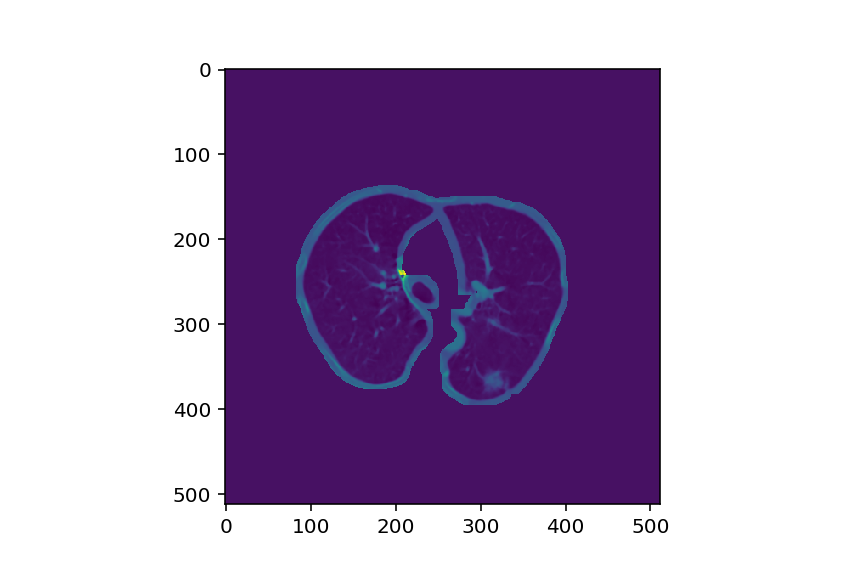

0.0 1.0
453.0
(355, 312)



<IPython.core.display.Javascript object>


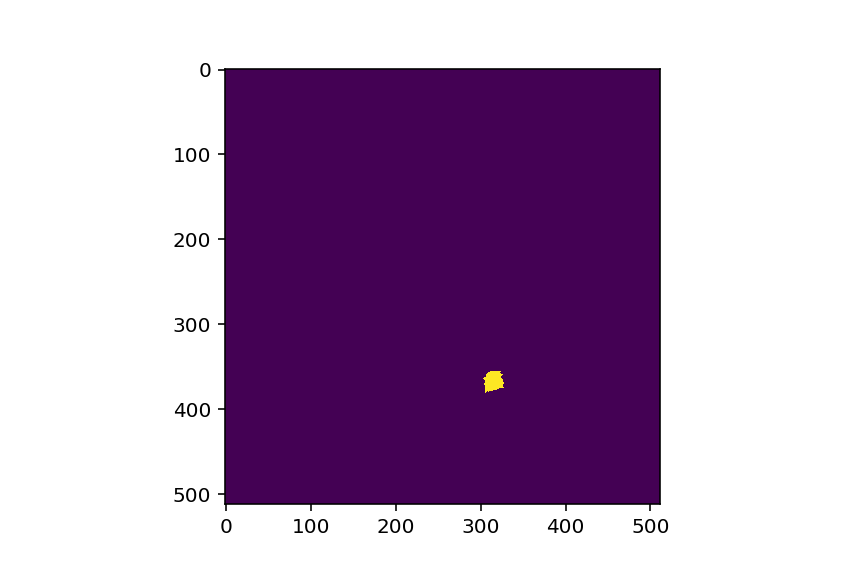

0 1
470
(355, 318)



<IPython.core.display.Javascript object>


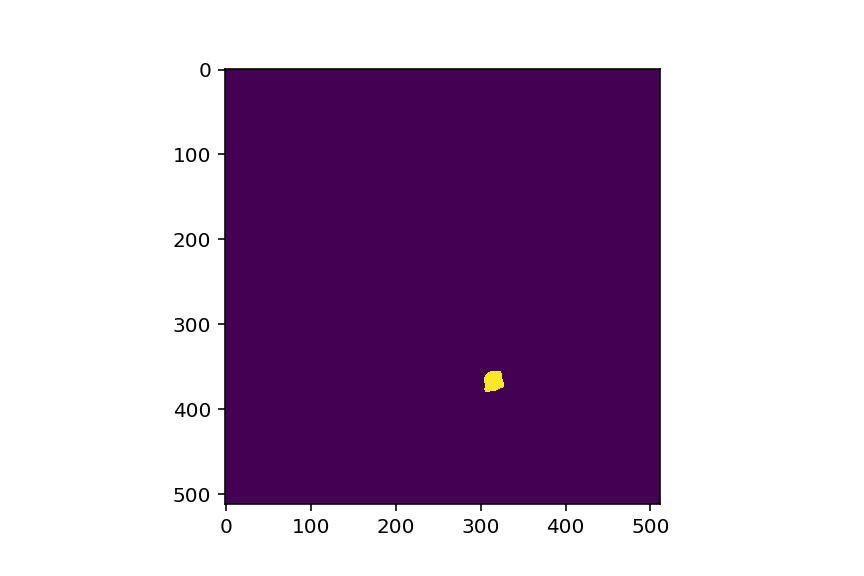

0.0 0.99999726
456.60754
(368, 316)



<IPython.core.display.Javascript object>


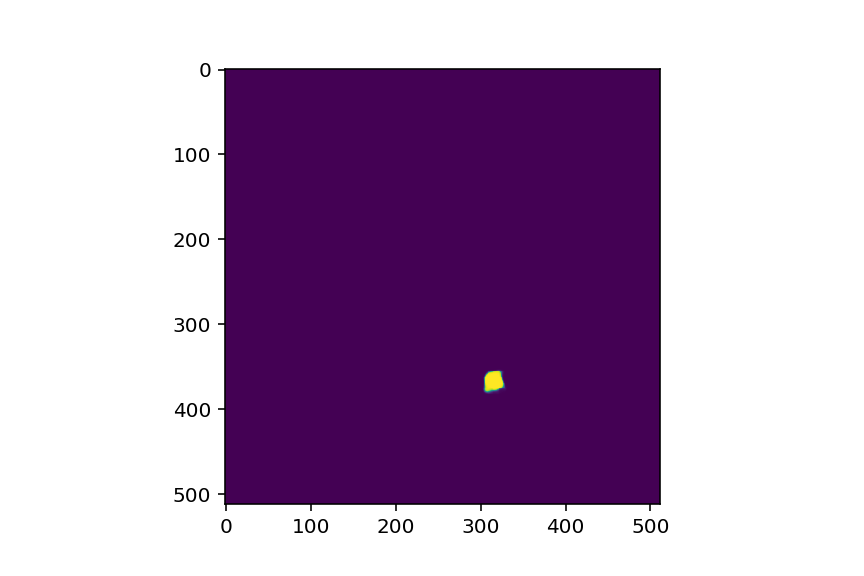

-0.21926743 4.912501
18525.77
(247, 212)



<IPython.core.display.Javascript object>


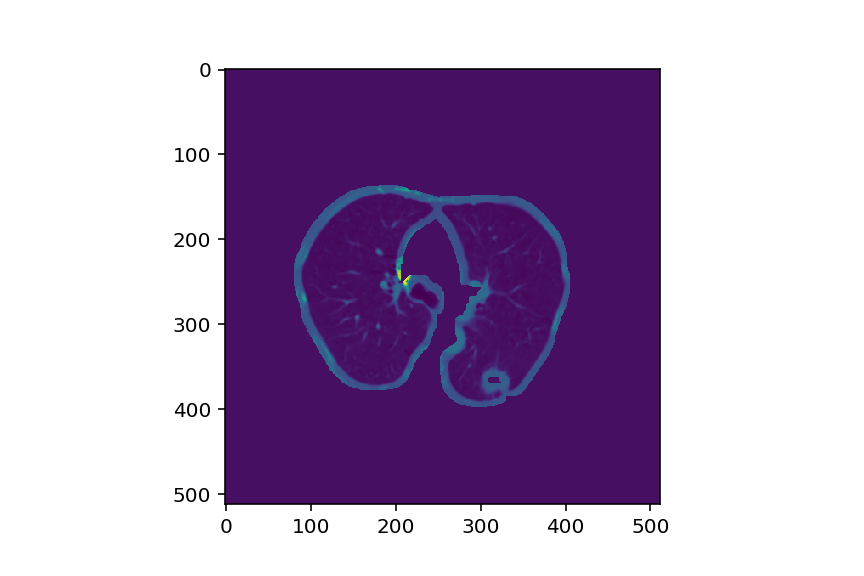

0.0 1.0
785.0
(351, 314)



<IPython.core.display.Javascript object>


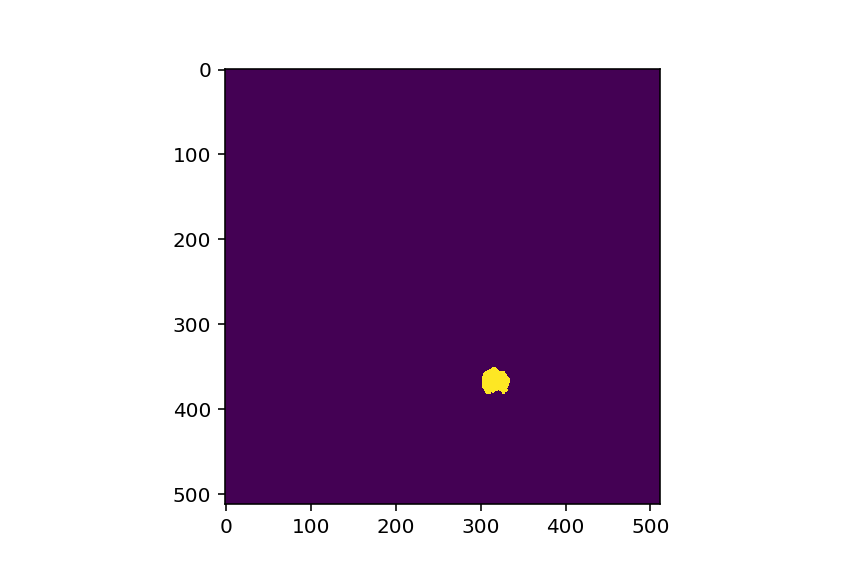

0 1
803
(351, 314)



<IPython.core.display.Javascript object>


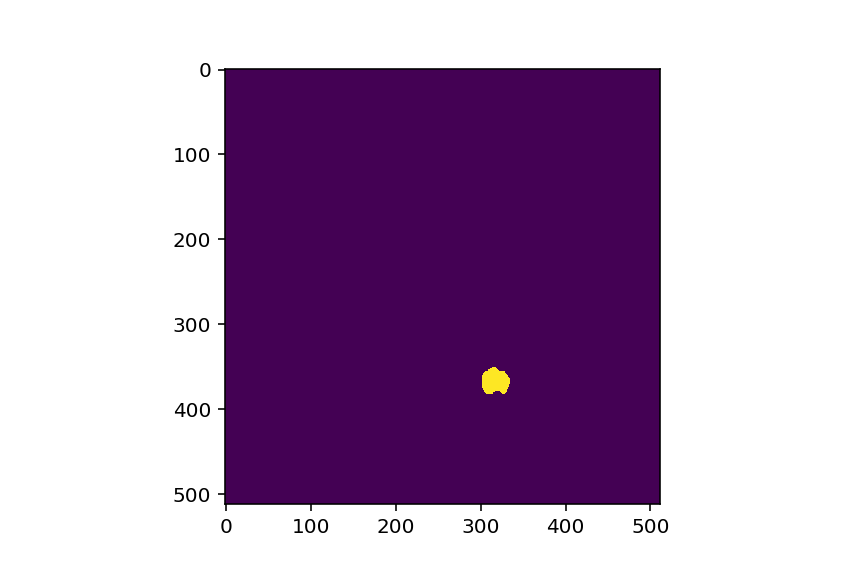

0.0 1.0
786.9918
(370, 313)



<IPython.core.display.Javascript object>


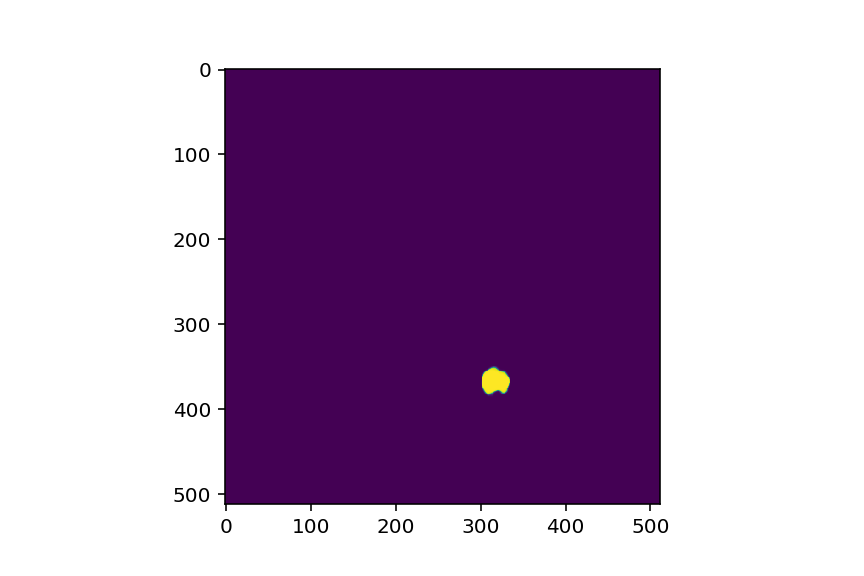

-0.20158166 4.0491223
19594.232
(243, 203)



<IPython.core.display.Javascript object>


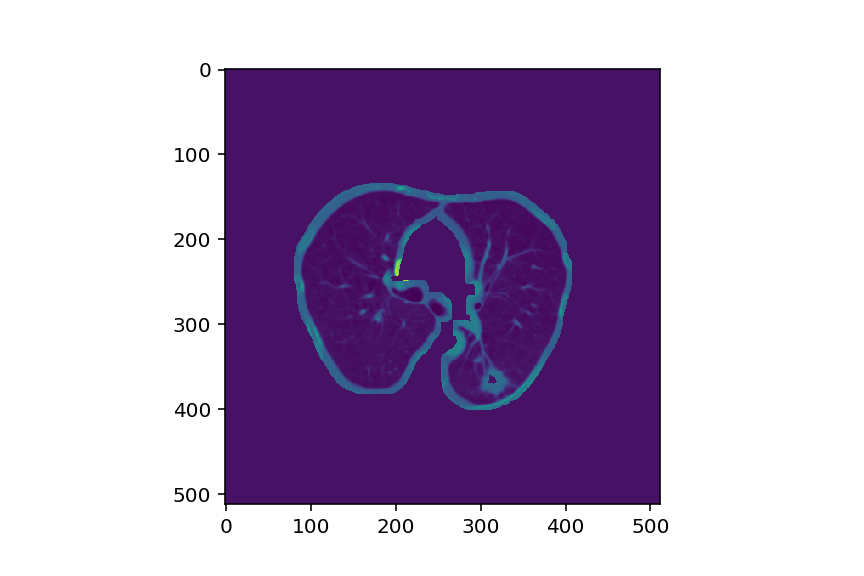

0.0 1.0
790.0
(348, 313)



<IPython.core.display.Javascript object>


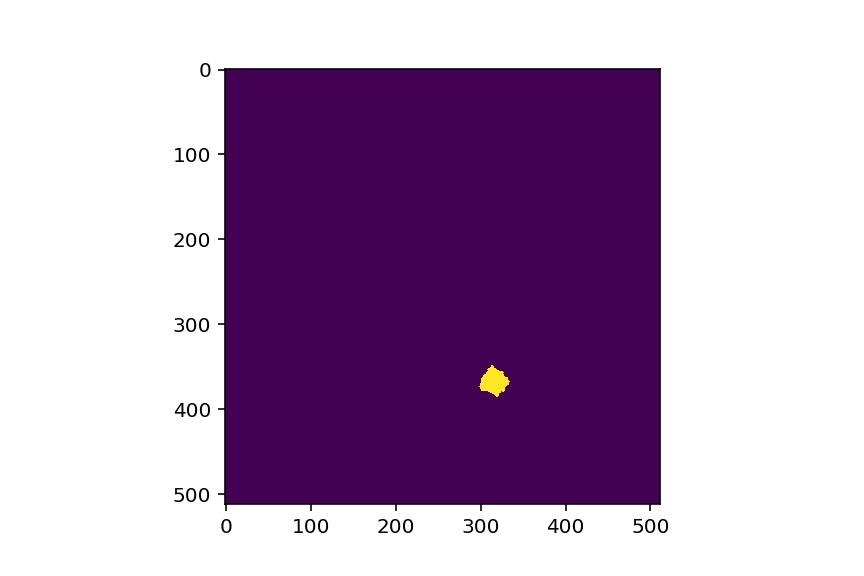

0 1
806
(349, 312)



<IPython.core.display.Javascript object>


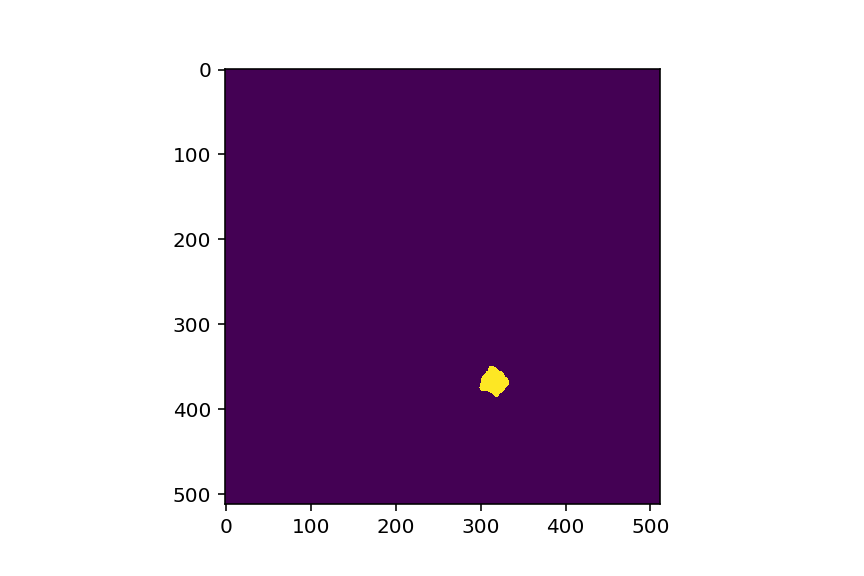

0.0 0.9999999
793.4514
(369, 320)



<IPython.core.display.Javascript object>


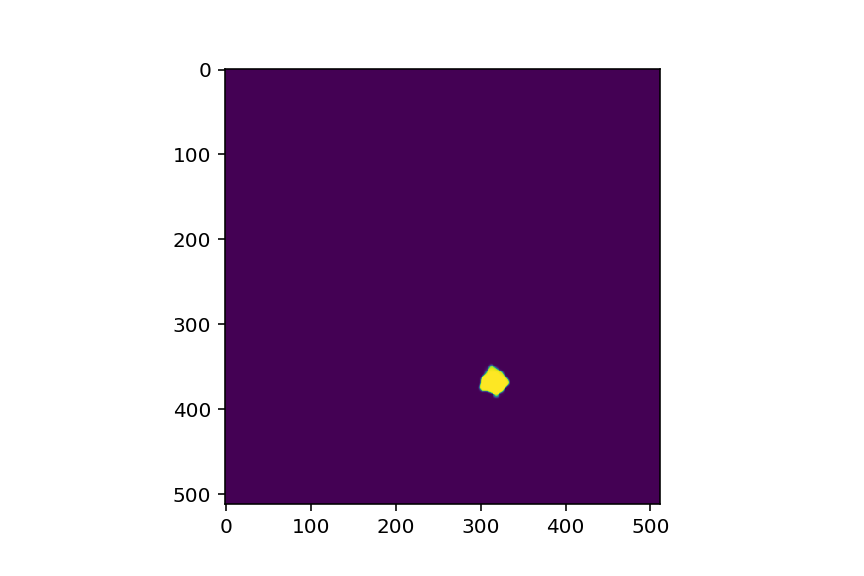

-0.212795 3.0631254
19324.09
(227, 206)



<IPython.core.display.Javascript object>


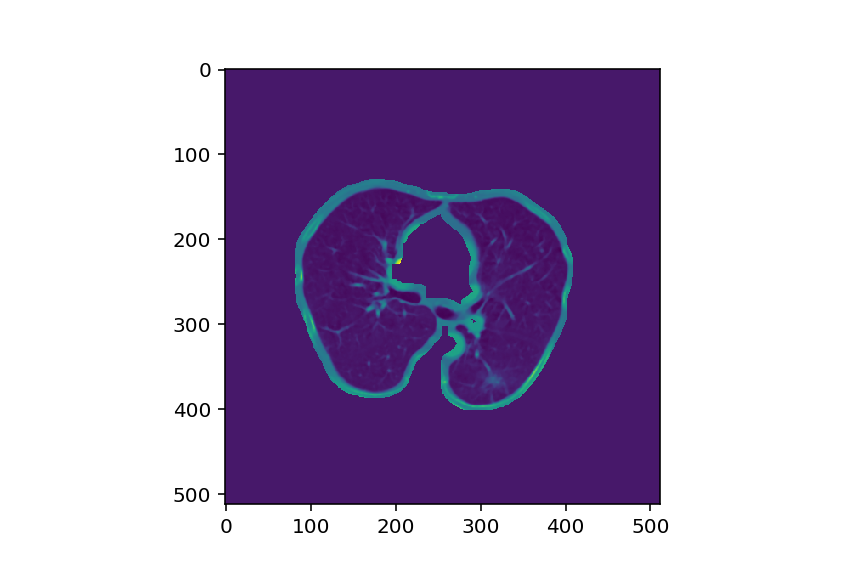

0.0 1.0
262.0
(358, 321)



<IPython.core.display.Javascript object>


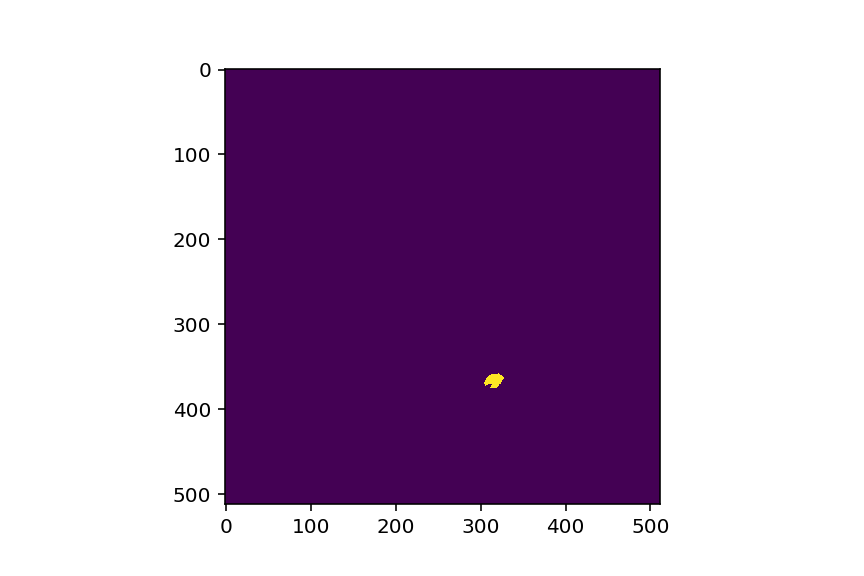

0 1
274
(358, 317)



<IPython.core.display.Javascript object>


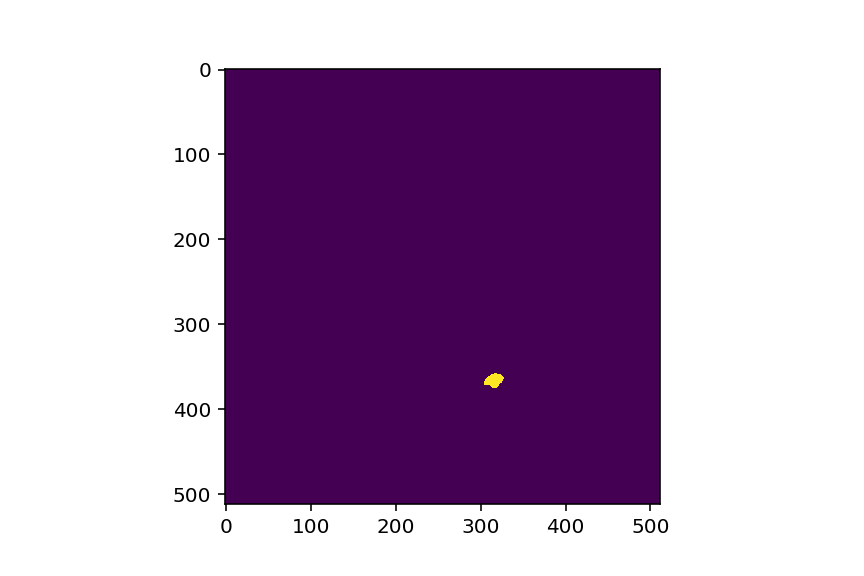

0.0 0.99966
268.25858
(366, 318)



<IPython.core.display.Javascript object>


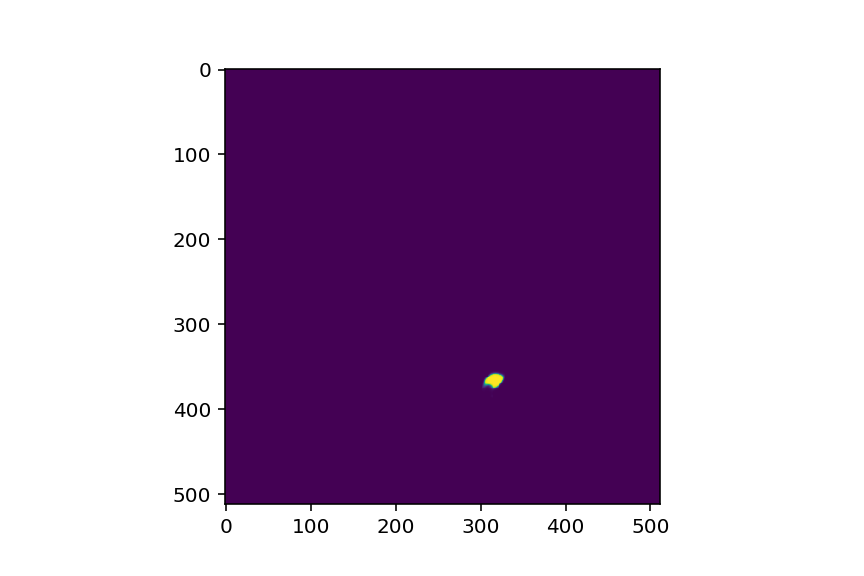

-0.22025777 4.047913
19420.662
(234, 201)



<IPython.core.display.Javascript object>


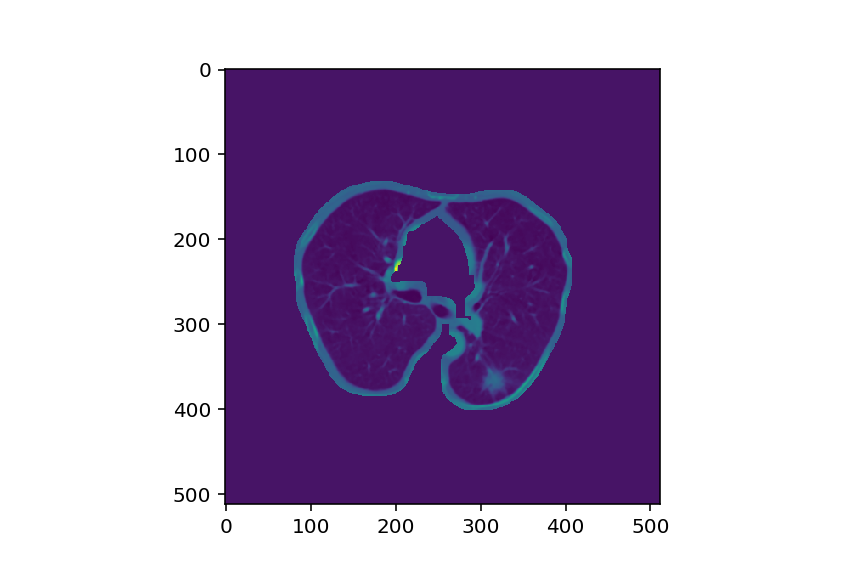

0.0 1.0
665.0
(350, 316)



<IPython.core.display.Javascript object>


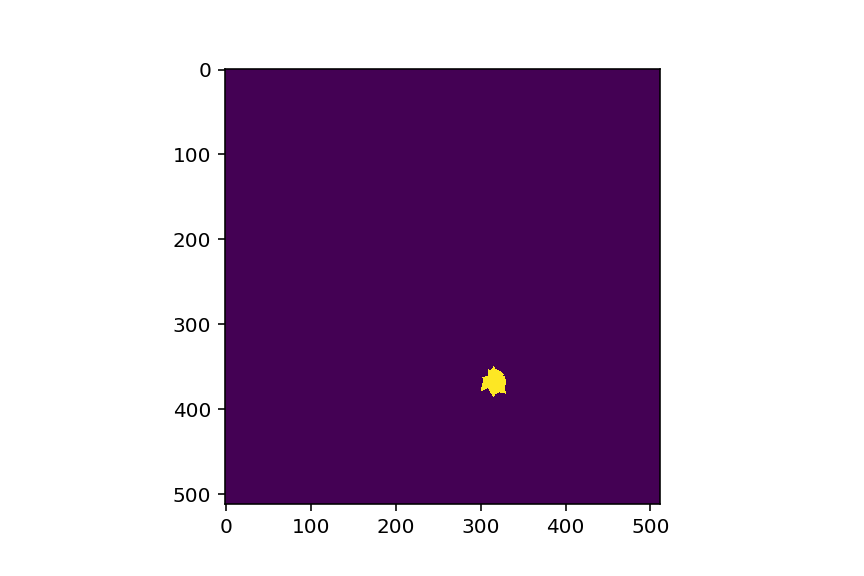

0 1
689
(351, 315)



<IPython.core.display.Javascript object>


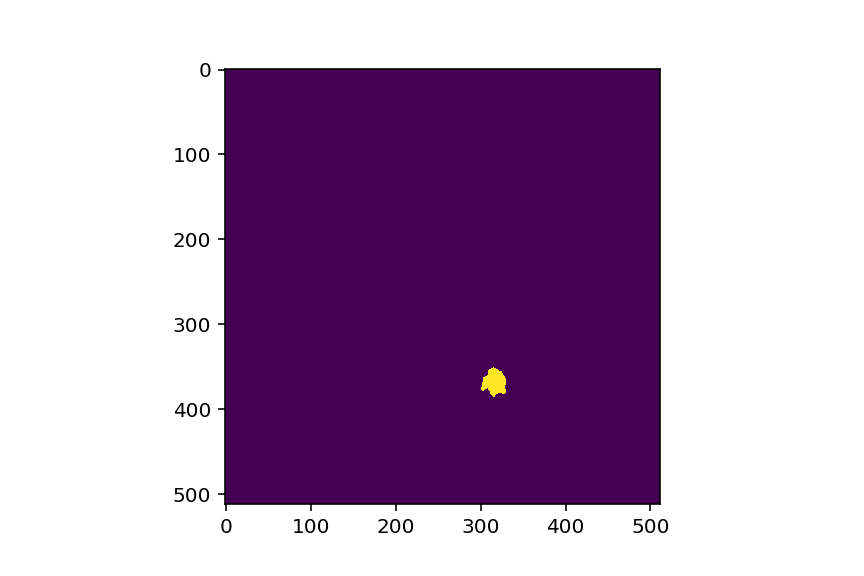

0.0 0.9999968
666.42615
(369, 318)



<IPython.core.display.Javascript object>


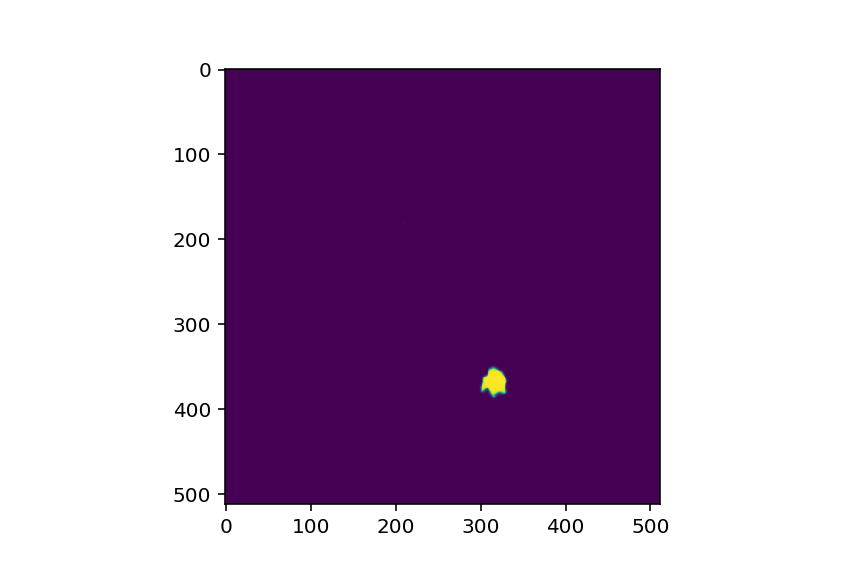

-0.22168608 4.574376
19171.67
(244, 203)



<IPython.core.display.Javascript object>


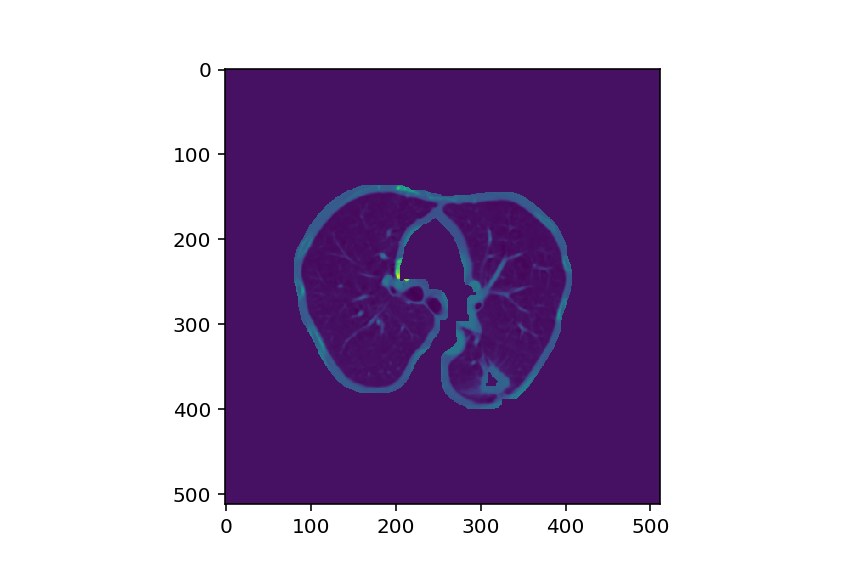

0.0 1.0
924.0
(343, 310)



<IPython.core.display.Javascript object>


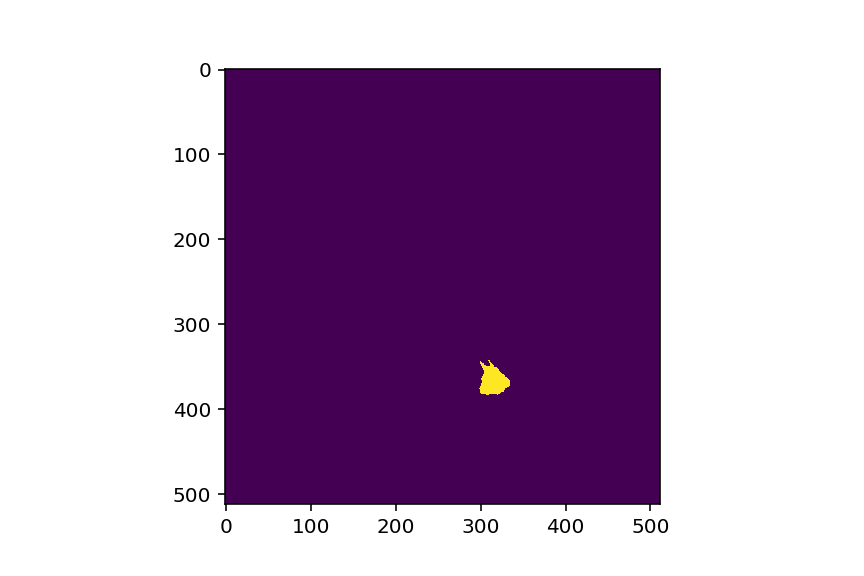

0 1
941
(344, 302)



<IPython.core.display.Javascript object>


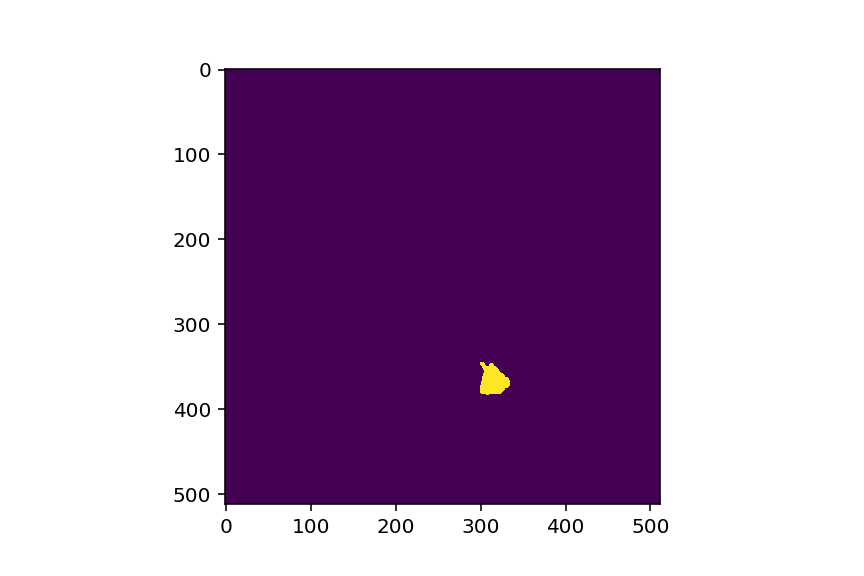

0.0 0.99999976
927.8574
(373, 310)



<IPython.core.display.Javascript object>


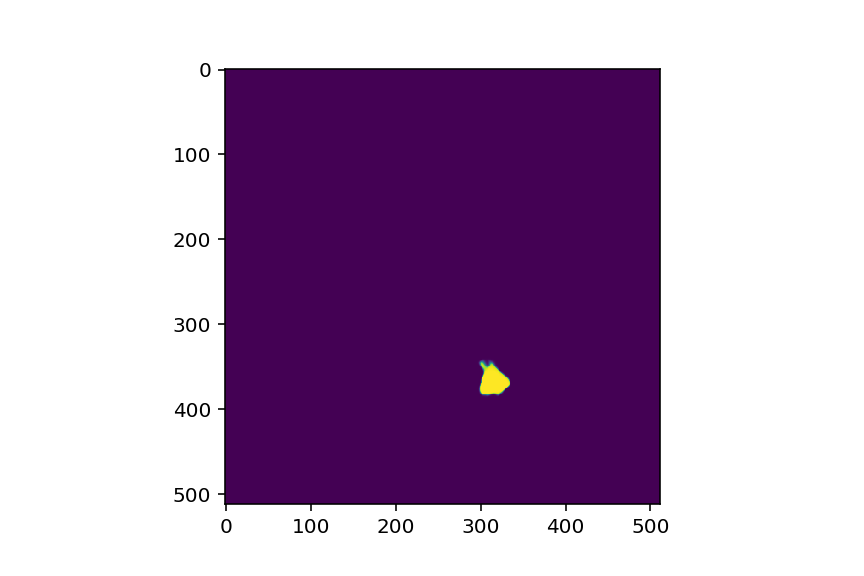

-0.22013587 4.8883753
18554.22
(246, 213)



<IPython.core.display.Javascript object>


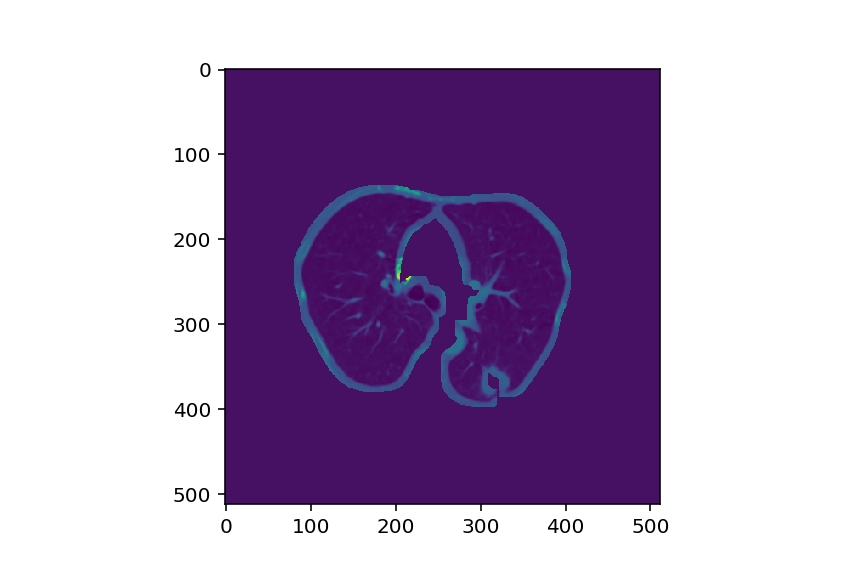

0.0 1.0
889.0
(348, 313)



<IPython.core.display.Javascript object>


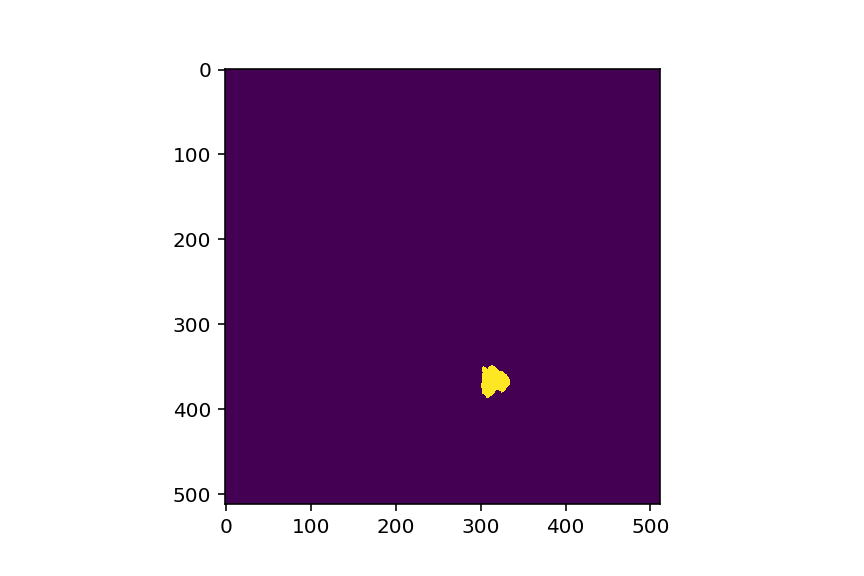

0 1
902
(349, 312)



<IPython.core.display.Javascript object>


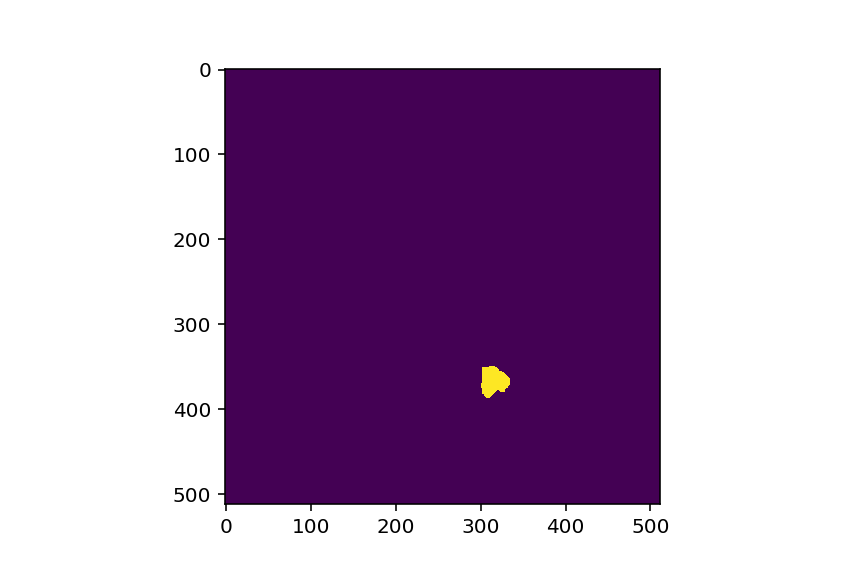

0.0 1.0
888.43896
(372, 309)



<IPython.core.display.Javascript object>


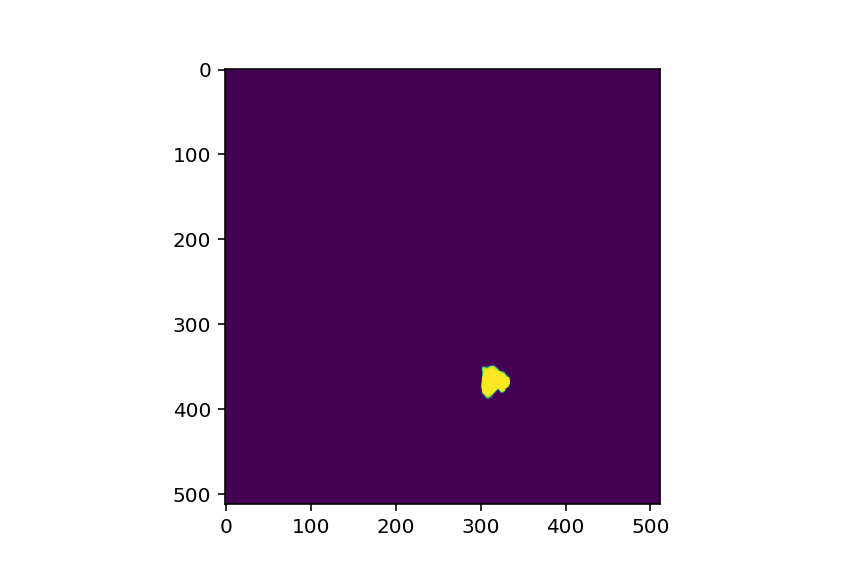

-0.220452 4.805774
18979.846
(244, 207)



<IPython.core.display.Javascript object>


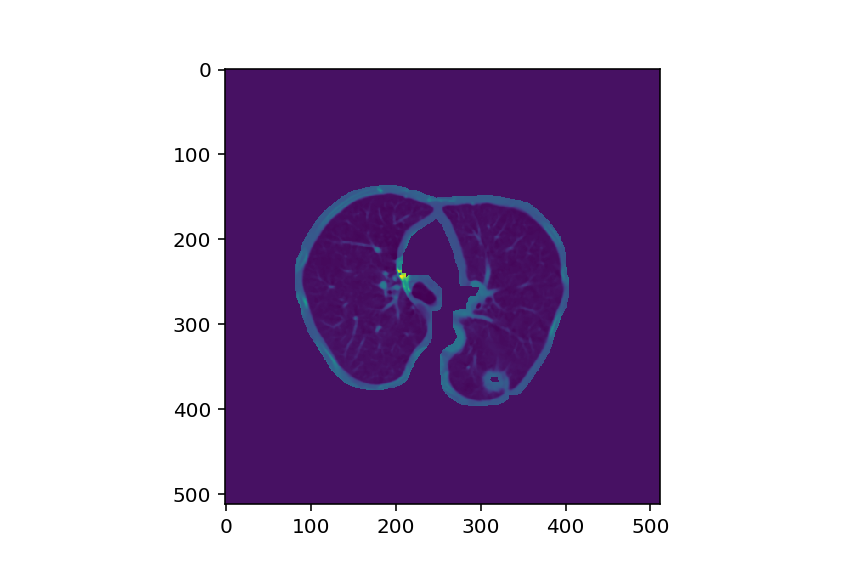

0.0 1.0
660.0
(355, 308)



<IPython.core.display.Javascript object>


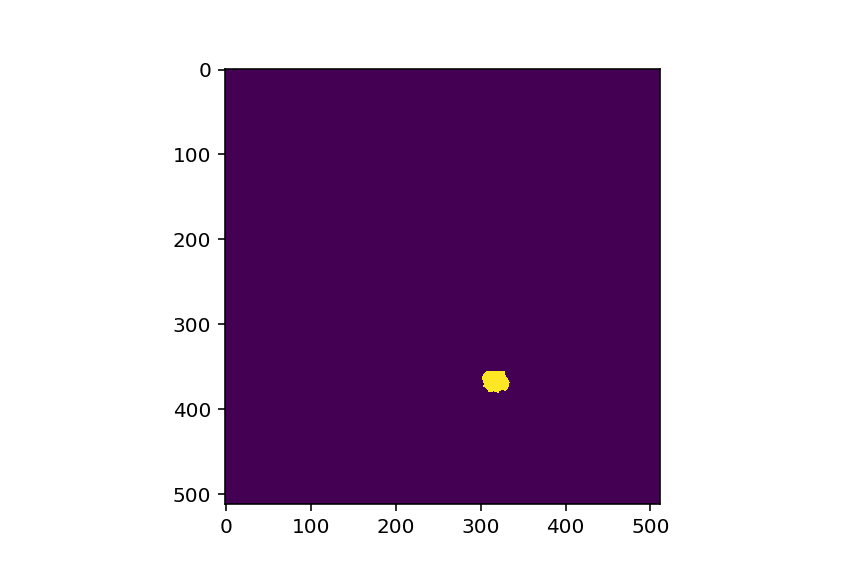

0 1
673
(355, 309)



<IPython.core.display.Javascript object>


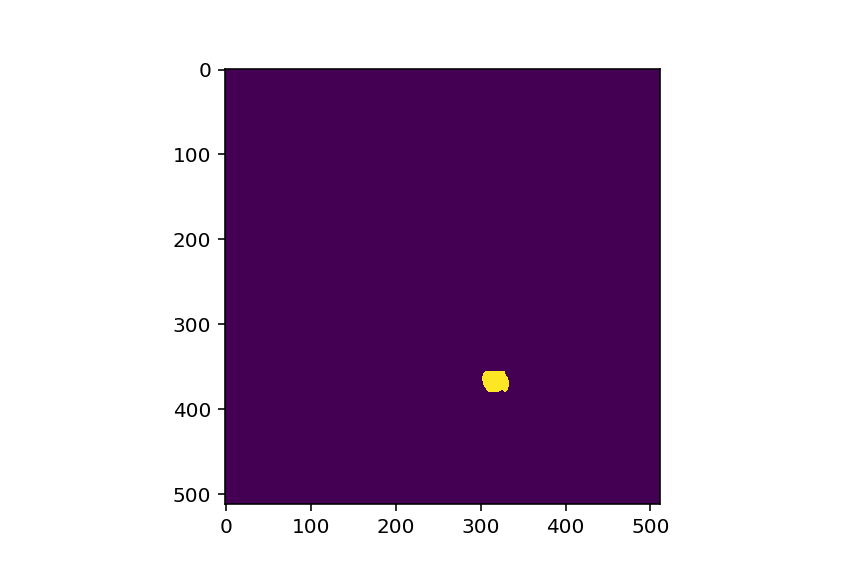

0.0 0.99999976
660.02515
(369, 315)



<IPython.core.display.Javascript object>


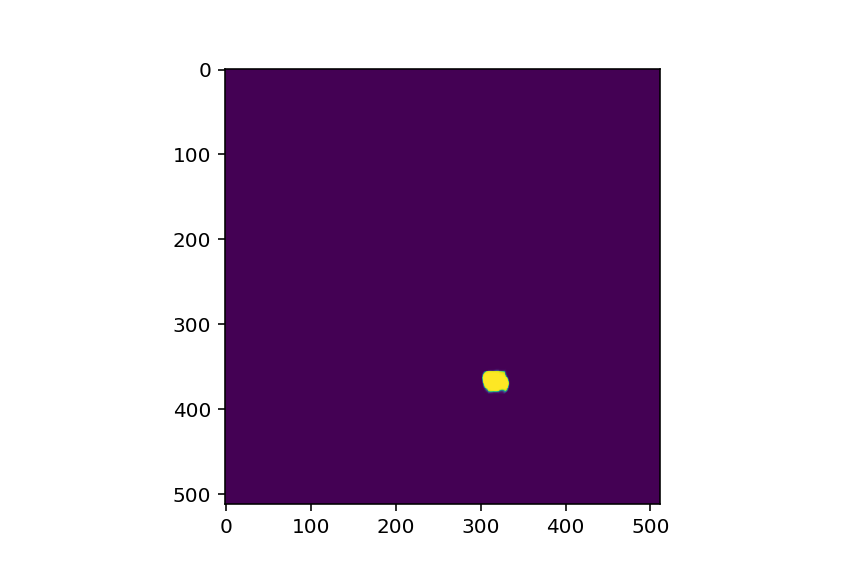

In [26]:
# prediction
from numpy import unravel_index
import math
%matplotlib notebook
# %matplotlib widget


model.eval()   # Set model to evaluate mode

# test_dataset = SimDataset(2, transform = trans)
test_set = SimDataset(
    main_dir=val_dataset_path, 
#     main_dir=train_dataset_path,
    transform=None
)

test_batch_size = 8
test_loader = DataLoader(test_set, batch_size=test_batch_size , shuffle=True, num_workers=num_workers)
inputs, labels = next(iter(test_loader))

# for i in range(4):
mask_prob = 0.4
outputs = []

for i in range(test_batch_size):
    img_num = i
    test_image = inputs.cpu()[img_num][0].numpy()
    test_mask = labels.cpu()[img_num][0].numpy()

    inputs = inputs.to(device, dtype=torch.float)
    labels = labels.to(device, dtype=torch.float)
#     pred = F.sigmoid(pred)

    pred = model(inputs)
    pred = F.sigmoid(pred)
    pred = pred.data.cpu().numpy()
    # pred = pred.data.cpu()



    predImg = pred[img_num][0]
    predMask = np.where(predImg > mask_prob, 1, 0)

    imgs = []
    imgs.append(test_image)
    imgs.append(test_mask)
    imgs.append(predMask)
    outputs.append(predMask)
    imgs.append(predImg)
    printImages(imgs)

In [27]:
SMOOTH = 1e-6

def iou_pytorch(outputs: torch.Tensor, labels: torch.Tensor):
    # You can comment out this line if you are passing tensors of equal shape
    # But if you are passing output from UNet or something it will most probably
    # be with the BATCH x 1 x H x W shape
#     outputs = outputs.squeeze(1)  # BATCH x 1 x H x W => BATCH x H x W
    labels = labels.squeeze(1)
    
    intersection = (outputs & labels).float().sum((1, 2))  # Will be zero if Truth=0 or Prediction=0
#     intersection = (outputs & labels).float().sum()  # Will be zero if Truth=0 or Prediction=0
    
    union = (outputs | labels).float().sum((1, 2))         # Will be zzero if both are 0
    iou = (intersection + SMOOTH) / (union + SMOOTH)  # We smooth our devision to avoid 0/0

    
    thresholded = torch.clamp(20 * (iou - 0.5), 0, 10).ceil() / 10  # This is equal to comparing with thresolds
    
#     return thresholded # Or thresholded.mean() if you are interested in average across the batch
    return iou * 100
    
# Numpy version
# Well, it's the same function, so I'm going to omit the comments

def iou_numpy(outputs: np.array, labels: np.array):
    outputs = outputs.squeeze(1)
    
    intersection = (outputs & labels).sum((1, 2))
    union = (outputs | labels).sum((1, 2))
    
    iou = (intersection + SMOOTH) / (union + SMOOTH)
    
    thresholded = np.ceil(np.clip(20 * (iou - 0.5), 0, 10)) / 10
    
    return thresholded  # Or thresholded.mean()


In [22]:
# print(labels.cpu().shape)
# print(len(outputs))
outputs = np.array(outputs)
# print(labels.shape)
# print(outputs.shape)

outputs = torch.from_numpy(outputs)
outputs = outputs.cpu().long()
labels = labels.cpu().long()

iou = iou_pytorch(outputs.cpu(), labels.cpu())
print(iou)
print(iou.mean())
# taret.cpu().long()

tensor([95.1684, 95.1100, 95.9519, 91.4286, 96.5347, 94.8798, 93.9828, 92.2917])
tensor(94.4185)


In [23]:
# torch.save(model.state_dict(), './best_model.pt')
# m = pytorch_unet.UNet(n_out_class).to(device, dtype=torch.float)
# m.load_state_dict(torch.load('./best_model.pt'))
# print(m)

In [24]:
# print(np.amax(pred[0][0]))
# plt.imshow(img)

In [25]:
# inputs, masks = next(iter(dataloaders['train']))
# inputs = inputs.to(device)
